In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.18.0


In [ ]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))
inputs = np.column_stack((xs, zs))
print(inputs.shape)

(1000, 2)


In [ ]:
noise = np.random.uniform(low=-1, high=1, size=(observations,1))
targets = 2*xs - 3*zs + 5 + noise
np.savez('TF_dataset', inputs=inputs, targets=targets)
print(targets.shape)

(1000, 1)


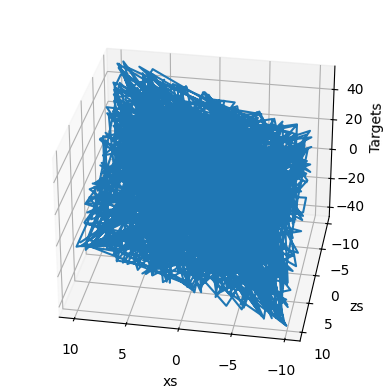

In [ ]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

In [ ]:
init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print(weights, biases)

[[-0.05906402]
 [-0.06452843]] [-0.01823947]


In [ ]:
targets = targets.reshape(observations, 1)  # Powrót do kształtu (1000, 1)
eta = 0.02  # Współczynnik uczenia
for i in range(100):
    outputs = np.dot(inputs, weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations
    print(loss)
    deltas_scaled = deltas / observations
    weights = weights - eta * np.dot(inputs.T, deltas_scaled)
    biases = biases - eta * np.sum(deltas_scaled)

226.9468007289342
35.86152022670288
14.411574149505936
11.638377667163496
10.940077367046818
10.486468237220127
10.074837299474598
9.682167242092415
9.305340382996864
8.943466624285914
8.59592468231463
8.262143843106209
7.941578881789633
7.633706483841406
7.3380240910493875
7.054049047689798
6.781317808924829
6.519385183719382
6.267823608089506
6.026222447165887
5.794187324896175
5.571339480287745
5.35731514913973
5.151764970254932
4.954353415162383
4.764758240419672
4.582669961601001
4.407791348112343
4.239836938009039
4.078532572023894
3.9236149460451166
3.774831181313606
3.6319384116379663
3.49470338695351
3.362902092578054
3.236319383543039
3.1147486334030683
2.997991396950598
2.8858570862852284
2.778162659708793
2.674732322938472
2.5753972421501494
2.479995268383651
2.3883706728599536
2.3003738927783535
2.215861287178618
2.1346949024696205
2.056742247241702
1.9818760759952083
1.9099741814321354
1.8409191949718602
1.774598395165318
1.7109035236948862
1.6497306086596466
1.5909797948

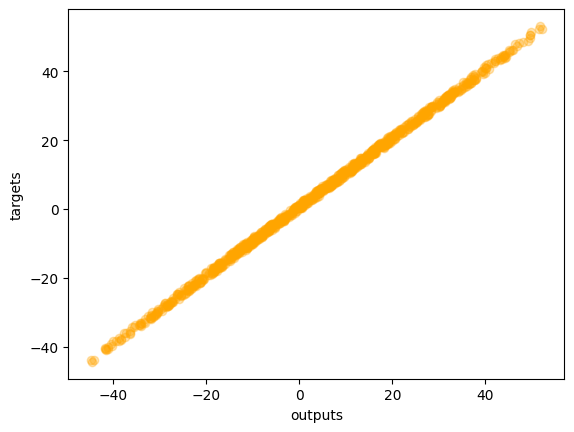

In [ ]:
plt.plot(outputs, targets, 'o', color='orange', alpha=0.3)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

In [ ]:
np.savez("TF_dataset.npz", inputs=inputs, targets=targets)

In [ ]:
training_data = np.load('TF_dataset.npz')
input_size = 1
output_size = 2

In [ ]:
model = tf.keras.Sequential([
    #tf.keras.layers.Dense(units=1, input_shape=(2,))
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(output_size)
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 455.7085   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 326.4104  
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 231.6620 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 180.9776 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 142.5744 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 131.4276 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107.8473 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89.1551 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88.5089 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88.9628  
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 84.2691  
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 66.1393 
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.8912 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.6507 
Epoch 15/100
32/32 ━━━━━━━━━━━━

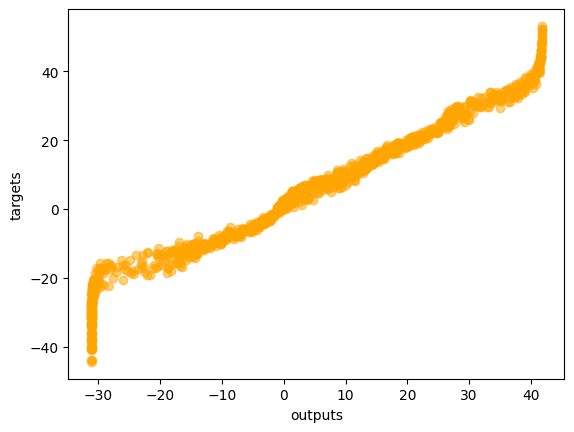

In [ ]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']), 'o', color='orange', alpha=0.3)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()